# COGS 108 - EDA Checkpoint

# Names

- Zhoutianning Pan
- Kelly Huang
- Demeng Zhang
- Duoduo Fu

<a id='research_question'></a>
# Research Question

Is there a statistically significant relationship between whether the seller paid to boost his product within the platform (E-commerce Wish) and the sales revenue for the product. Additionally, test the same relationship in each price range group by disaggreagating the data into different groups accoridng to the price range.

# Setup

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
from scipy.stats import mannwhitneyu

# Data Cleaning

The first step was to read in the csv with pandas. Next, we found the unique number of currencies to examine whether the prices are all in the same currency. Then, since we wanted to investigate the relationship between the utilization of ad boosts and sales revenue, we keep the three relevant columns: price, units_sold, and uses_ad_boosts. Finally, we calculated the total revenue of each product by multiplying price and units_sold.

In [56]:
## import data
df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

## we want to see if all retail price is in the same currency
unique_currencies = df['currency_buyer'].unique()

if len(unique_currencies) == 1:
    print("All retail prices in the dataset are in the same currency:", unique_currencies[0])
else:
    print("Retail prices in the dataset are in different currencies.")

## delete the irrelevant columns
df = df[['price','units_sold','uses_ad_boosts','tags', 'rating', 'rating_count', 'rating_five_count']]

## take a look at the data
df.head()

All retail prices in the dataset are in the same currency: EUR


,price,units_sold,uses_ad_boosts,tags,rating,rating_count,rating_five_count
0,16.00,100,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",3.76,54,26.0
1,8.00,20000,1,"Mini,womens dresses,Summer,Patchwork,fashion d...",3.45,6135,2269.0
2,8.00,100,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",3.57,14,5.0
3,8.00,5000,1,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",4.03,579,295.0
4,2.72,100,1,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",3.10,20,6.0


In [57]:
## calculate the total_revenue
df['total_revenue'] = df['price'] * df['units_sold']
df

,price,units_sold,uses_ad_boosts,tags,rating,rating_count,rating_five_count,total_revenue
0,16.00,100,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",3.76,54,26.0,1600.0
1,8.00,20000,1,"Mini,womens dresses,Summer,Patchwork,fashion d...",3.45,6135,2269.0,160000.0
2,8.00,100,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",3.57,14,5.0,800.0
3,8.00,5000,1,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",4.03,579,295.0,40000.0
4,2.72,100,1,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",3.10,20,6.0,272.0
...,...,...,...,...,...,...,...,...
1568,6.00,10000,1,"bohemia,Plus Size,dandelionfloralprinted,short...",4.08,1367,722.0,60000.0
1569,2.00,100,1,"Summer,Panties,Elastic,Lace,Casual pants,casua...",3.07,28,11.0,200.0
1570,5.00,100,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",3.71,59,24.0,500.0
1571,13.00,100,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",2.50,2,0.0,1300.0


In [58]:
# display the distribution of prices
price_hist = px.histogram(df['price'], histnorm='probability', marginal='box', title="Distribution of Prices", barmode='overlay',nbins=10, opacity=0.7)
price_hist.show()

In [59]:
# assgin the price to different price range category 
def price_range(price):
    if price <= 5:
        return '0 - 5'
    elif 5 < price <= 10:
        return '5 - 10'
    elif 10 < price <= 15:
        return '10 - 15'
    else:
        return 'over 20'

df['price_range'] = df['price'].apply(price_range)
df

,price,units_sold,uses_ad_boosts,tags,rating,rating_count,rating_five_count,total_revenue,price_range
0,16.00,100,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",3.76,54,26.0,1600.0,over 20
1,8.00,20000,1,"Mini,womens dresses,Summer,Patchwork,fashion d...",3.45,6135,2269.0,160000.0,5 - 10
2,8.00,100,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",3.57,14,5.0,800.0,5 - 10
3,8.00,5000,1,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",4.03,579,295.0,40000.0,5 - 10
4,2.72,100,1,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",3.10,20,6.0,272.0,0 - 5
...,...,...,...,...,...,...,...,...,...
1568,6.00,10000,1,"bohemia,Plus Size,dandelionfloralprinted,short...",4.08,1367,722.0,60000.0,5 - 10
1569,2.00,100,1,"Summer,Panties,Elastic,Lace,Casual pants,casua...",3.07,28,11.0,200.0,0 - 5
1570,5.00,100,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",3.71,59,24.0,500.0,0 - 5
1571,13.00,100,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",2.50,2,0.0,1300.0,10 - 15


In [60]:
# pivot table showing the mean 'total revenue' according to price range and boolean of 'uses_ad_boosts'
df.pivot_table(index='price_range',
               columns='uses_ad_boosts',
               values='total_revenue',
               aggfunc='mean')

uses_ad_boosts,0,1
price_range,,
0 - 5,18377.108099,12199.491713
10 - 15,41383.817460,50046.585366
5 - 10,37307.235948,37664.334983
over 20,48345.948718,45812.727273


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [61]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              1573 non-null   float64
 1   units_sold         1573 non-null   int64  
 2   uses_ad_boosts     1573 non-null   int64  
 3   tags               1573 non-null   object 
 4   rating             1573 non-null   float64
 5   rating_count       1573 non-null   int64  
 6   rating_five_count  1528 non-null   float64
 7   total_revenue      1573 non-null   float64
 8   price_range        1573 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 110.7+ KB
None
             price     units_sold  uses_ad_boosts       rating  rating_count  \
count  1573.000000    1573.000000     1573.000000  1573.000000   1573.000000   
mean      8.325372    4339.005086        0.432931     3.820896    889.659250   
std       3.932030    9356.539302        0.495639     0.5

[Text(0.5, 1.0, 'Distribution of price')]

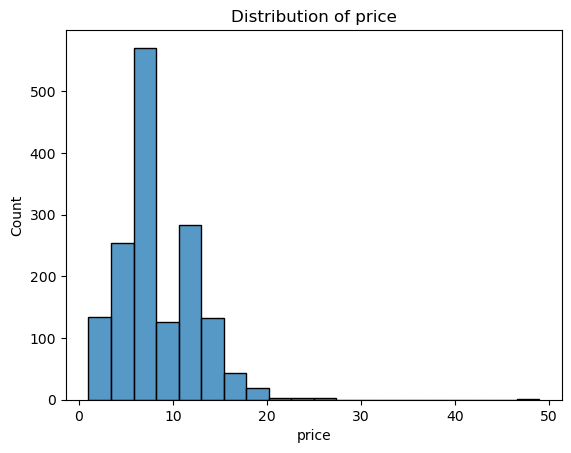

In [62]:
# distribution of 'price'
sns.histplot(data=df, x='price', bins=20).set(title= 'Distribution of price')

[Text(0.5, 1.0, 'Distribution of rating')]

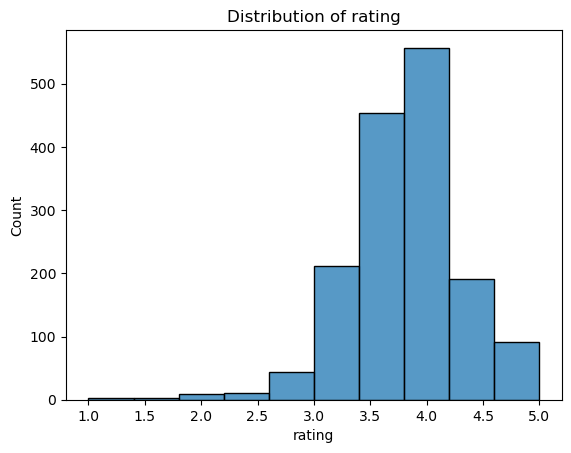

In [76]:
# distribution of 'units_sold'
sns.histplot(data=df, x='rating', bins=10).set(title= 'Distribution of rating')

[Text(0.5, 1.0, 'Scatterplot of rating and units_sold')]

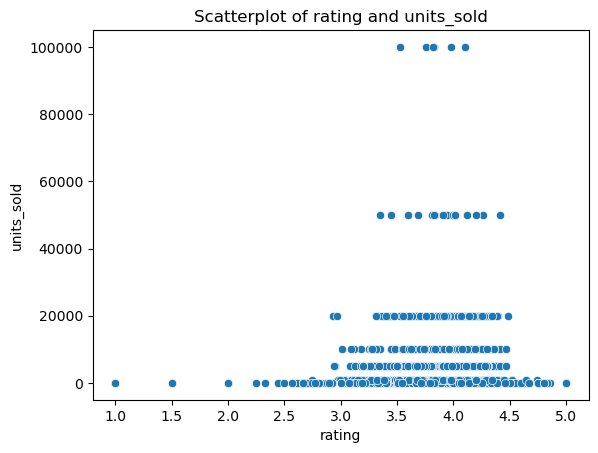

In [82]:
sns.scatterplot(data = df, x='rating', y='units_sold').set(title= 'Scatterplot of rating and units_sold')

From this scatterplot, we can see products with higher rating tends to have higher units sold, so rating can also be a factor in our inferece analysis.

[Text(0.5, 1.0, 'Distribution of units_sold')]

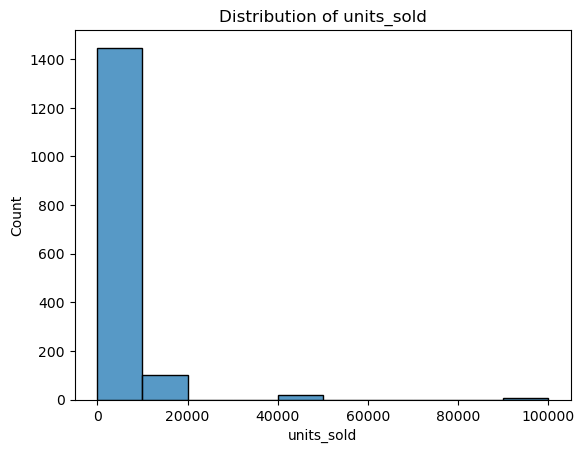

In [63]:
# distribution of 'units_sold'
sns.histplot(data=df, x='units_sold', bins=10).set(title= 'Distribution of units_sold')

We can see the distribution of units sold is heavily left skewed, so we can explore the distribution of 'units_sold' less than 20000.

[Text(0.5, 1.0, 'Distribution of low units_sold')]

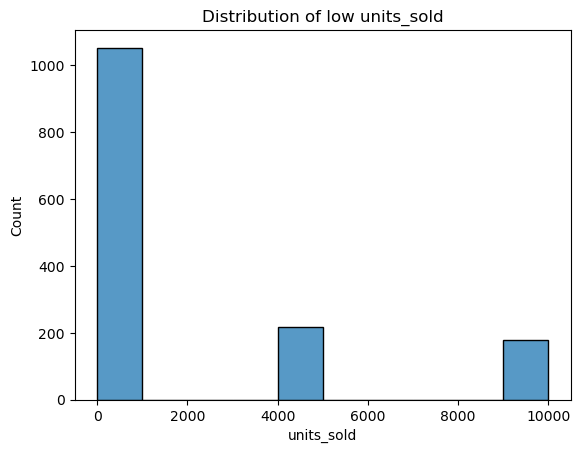

In [64]:
# distribution of 'units_sold' less than 20000
low_sale = df[df['units_sold'] < 20000]
sns.histplot(data=low_sale, x='units_sold', bins=10).set(title= 'Distribution of low units_sold')

[Text(0.5, 1.0, 'Countplot of uses_ad_boosts')]

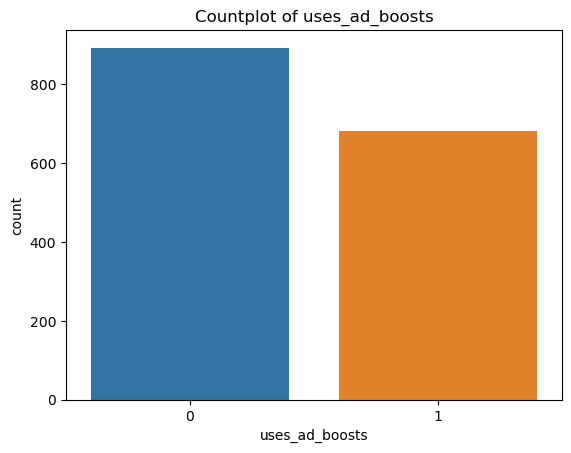

In [65]:
# countplot of 'uses_ad_boosts'
sns.countplot(x=df["uses_ad_boosts"]).set(title='Countplot of uses_ad_boosts')

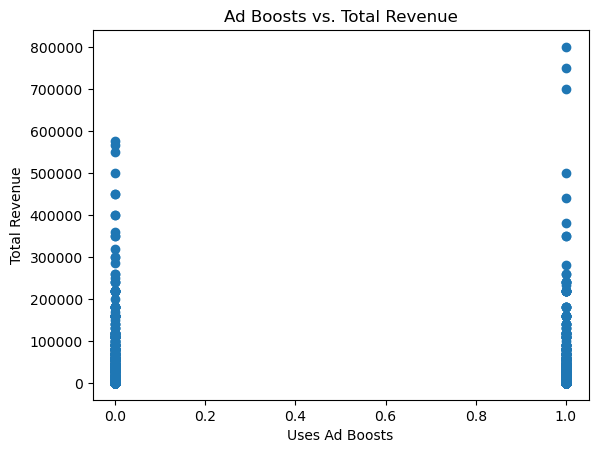

In [68]:
## scatter plot of ad usage and total revenue.
plt.scatter(df['uses_ad_boosts'], df['total_revenue'])
plt.xlabel('Uses Ad Boosts')
plt.ylabel('Total Revenue')
plt.title('Ad Boosts vs. Total Revenue')
plt.show()

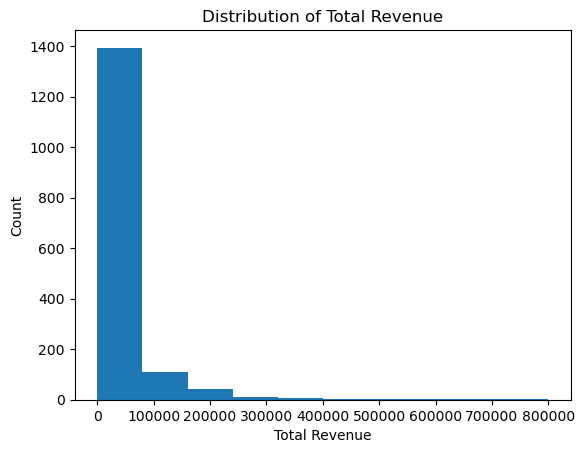

In [69]:
## crate a histogram of the total revenue
plt.hist(df['total_revenue'], bins=10)
plt.xlabel('Total Revenue')
plt.ylabel('Count')
plt.title('Distribution of Total Revenue')
plt.show()

As we can see, the histogram is heavily skewed to the left, which indicates that some items have significantly higher total revenue compared to the majority of items. Since the distribution of total revenue is heavily skewed, we can perform a Mann-Whitney U test to see the relationship between ad usage and total revenue.

In [70]:
## split the entire dataset into groups with ad and without ad
ad_boosts_group = df[df['uses_ad_boosts'] == 1]
no_ad_boosts_group = df[df['uses_ad_boosts'] == 0]
## perform Mann_Whitney U test
statistic, p_value = mannwhitneyu(ad_boosts_group['total_revenue'], no_ad_boosts_group['total_revenue'])
print(f"U-statistic: {statistic}")
print(f"P-value: {p_value}")

U-statistic: 294523.0
P-value: 0.3024369931290255


In [71]:
# Separate the data into price range groups
price_range_groups = df.groupby('price_range')

# Perform Mann-Whitney U test for each price range group
for price_range, group_df in price_range_groups:
    ad_boosts_group = group_df[group_df['uses_ad_boosts'] == 1]
    no_ad_boosts_group = group_df[group_df['uses_ad_boosts'] == 0]

    statistic, p_value = mannwhitneyu(ad_boosts_group['total_revenue'], no_ad_boosts_group['total_revenue'])
    print(f"Price Range: {price_range}")
    print(f"U-statistic: {statistic}")
    print(f"P-value: {p_value}")
    print()

Price Range: 0 - 5
U-statistic: 12965.0
P-value: 0.8915515537633922

Price Range: 10 - 15
U-statistic: 19902.0
P-value: 0.5232845495065555

Price Range: 5 - 10
U-statistic: 72932.0
P-value: 0.25323499665187277

Price Range: over 20
U-statistic: 722.5
P-value: 0.3695022548037793



From the Mann-Whitney U test, we can see that p value is greater than the significance level 0.05, which means there is no significant difference between group that used ad boost and group that didn't. However, are there some common features of items with high total revenue?

In [72]:

high_rev_items = df[df['total_revenue'] > 100000]  
print(high_rev_items)

      price  units_sold  uses_ad_boosts  \
1       8.0       20000               1   
6       7.0       50000               0   
16     11.0       10000               0   
17      5.0      100000               1   
18      9.0       20000               0   
...     ...         ...             ...   
1537   11.0       10000               0   
1548   12.0       10000               0   
1557    9.0       20000               0   
1558   13.0       10000               0   
1567    8.0       20000               1   

                                                   tags  rating  rating_count  \
1     Mini,womens dresses,Summer,Patchwork,fashion d...    3.45          6135   
6     blouse,Women,lace t shirt,summer t-shirts,Lace...    3.84          6742   
16    Summer,fashion women,Fashion,Mini,Dresses,Tops...    3.72          2058   
17    blouse,Plus Size,Lace,lace top,Tops,Fashion,st...    3.83         17980   
18    Summer,Fashion,tunic,Women Vest,Tank,Tops,tops...    3.82          5479 